# Customer Segmentation with K-means

**Datacamp** : https://app.datacamp.com/learn/courses/customer-segmentation-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data pre-processing for k-means clustering

**Advantages of k-means clustering :**

- One of the most pupular unsupervised leanring method
- Simple and fast
- Works well (with certain assumptions about data)

**Key k-means assumptions :**
- Symmetric distribution of variables (not skewed)
- Variables with same average values
- Variables with same variance

**Skewed variables :**
- Left-skewed or Right-skewed => skew can be removed with logarithmic tranformation (Gaussian)

**Variables on the same scale :**
- K-means assumes equal mean
- And equal variance
- It's not the case with RFM data

In [3]:
# Load datamart from RFM
datamart = pd.read_csv('data/datamart_RFM.csv')
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,GeneralSegment
0,2,27,992.82,4,4,4,444,12,Gold
1,1,967,7522.06,4,4,4,444,12,Gold
2,4,37,813.45,4,4,4,444,12,Gold
3,3,17,268.02,4,3,3,433,10,Gold
4,71,9,146.15,2,2,3,223,7,Silver


In [4]:
# Key statistics
datamart.describe()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,2.516347,2.427722,2.499325,278.411240,7.443394
std,99.974969,44.831615,1474.285937,1.128292,1.151018,1.118547,119.232462,2.825434
min,1.000000,1.000000,0.650000,1.000000,1.000000,1.000000,111.000000,3.000000
25%,19.000000,4.000000,59.400000,2.000000,1.000000,1.000000,211.000000,5.000000
50%,52.000000,9.000000,140.300000,3.000000,2.000000,2.000000,311.000000,7.000000
75%,151.000000,21.000000,337.800000,4.000000,3.000000,3.000000,411.000000,10.000000
max,374.000000,1532.000000,59596.070000,4.000000,4.000000,4.000000,444.000000,12.000000


In [5]:
# Average values
datamart.mean(numeric_only=True)

Recency           94.298568
Frequency         19.147257
MonetaryValue    380.535069
R                  2.516347
F                  2.427722
M                  2.499325
RFM_segment      278.411240
RFM_score          7.443394
dtype: float64

In [6]:
# STD 
datamart.std(numeric_only=True)

Recency            99.974969
Frequency          44.831615
MonetaryValue    1474.285937
R                   1.128292
F                   1.151018
M                   1.118547
RFM_segment       119.232462
RFM_score           2.825434
dtype: float64

# Managing skewed variables

**Identifying skewness :**
- Visual analysis of the distribution
- If it has a tail, it's skewed (left or right)

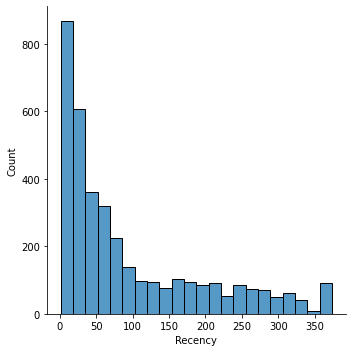

In [7]:
# Exploring distribution of Recency => Right skewed
sns.displot(datamart['Recency'])
plt.show()

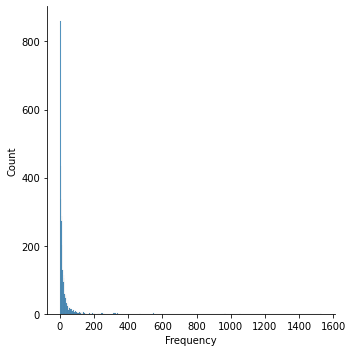

In [8]:
# Exploring distribution of Frequency => Right skewed
sns.displot(datamart['Frequency'])
plt.show()

**Data tranformations to manage skewness :**
- Logarithmic transformation (positive values only)

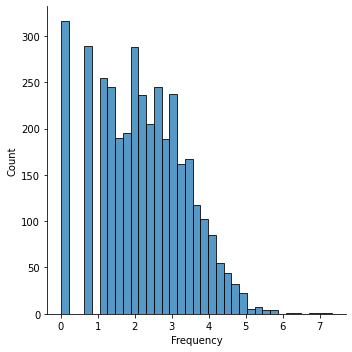

In [9]:
# Log tranformation of Frequency
frequency_log = np.log(datamart['Frequency'])
sns.displot(frequency_log)
plt.show()

**Although it's not perfectly symmetrical, it has very little skewness compared to the original distribution.**

**Dealing with negative values :**
- Adding a constant before log transformation
- Cube root tranformation

# Centering and scaling data

**Identifying an issue :**
- Analyze key statistics of the dataset
- Compare mean and standard deviation

In [10]:
datamart_RFM = datamart[['Recency', 'Frequency', 'MonetaryValue']]
datamart_RFM.describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069
std,99.974969,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,151.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


We can immediately see that **each of our three variables has both a different average value and a different standard deviation.** In the next step, we will deal with centering the data to make the average values match.

**Centering variables with different means :**
- K-means works well on variables with the same mean
- Centering variables is done by substracting average value frome each observation

In [11]:
datamart_centered = datamart_RFM - datamart_RFM.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3701.00,3701.00,3701.00
mean,-0.00,-0.00,0.00
std,99.97,44.83,1474.29
min,-93.30,-18.15,-379.89
25%,-75.30,-15.15,-321.14
50%,-42.30,-10.15,-240.24
75%,56.70,1.85,-42.74
max,279.70,1512.85,59215.53


**Scaling variables with different variance :**

- K-means works better on variables with the same variance / standard deviation
- Scaling variables is done by dividing them by standar deviation of each

In [12]:
datamart_scaled = datamart_RFM / datamart_RFM.std()
datamart_scaled.describe

<bound method NDFrame.describe of        Recency  Frequency  MonetaryValue
0     0.020005   0.602254       0.673424
1     0.010003  21.569600       5.102172
2     0.040010   0.825310       0.551759
3     0.030008   0.379197       0.181796
4     0.710178   0.200751       0.099133
...        ...        ...            ...
3696  2.780696   0.044611       0.026250
3697  1.810453   0.044611       0.021570
3698  0.080020   0.044611       0.020824
3699  0.040010   3.390465       0.293654
3700  0.430108   0.334585       0.268442

[3701 rows x 3 columns]>

**Combining centering and scaling :**
- Substract mean and divide by std manually
- Or use a scaler from scikit-learn library (returns np.ndarray object)

In [13]:
# Use Standard Scaler
scaler = StandardScaler()
scaler.fit(datamart_RFM)
datamart_normalized = scaler.transform(datamart_RFM)

In [14]:
# Print mean & std
print('mean :', datamart_normalized.mean(axis=0).round(2))
print('std :', datamart_normalized.std(axis=0).round(2))

mean : [-0.  0.  0.]
std : [1. 1. 1.]


# Preprocessing pipeline

**Why the sequence matters ?**
- Log tranformation only works with positive data
- Normalization forces data to have negative values and log will not work

**Sequence :**
1. Unskew the data - log transformation
2. Standardize to the same average values
3. Scale to the same std
4. Store as a seperate array to be used for clustering

In [15]:
datamart_RFM.head()

,Recency,Frequency,MonetaryValue
0,2,27,992.82
1,1,967,7522.06
2,4,37,813.45
3,3,17,268.02
4,71,9,146.15


In [16]:
# 1. Unskew the data
datamart_log = np.log(datamart_RFM)

# 2. Normalize the variables
scaler = StandardScaler()
scaler.fit(datamart_log)

# 3. Store for clustering
datamart_normalized = scaler.transform(datamart_log)

We are now ready to run k-means clustering and identify valuable customer segments.

# Practical implementation of k-means clustering

**Key steps :**
- Data pre-processing (see previous cell)
- Choosing a number of clusters
- Running k-means clustering on pre-processed data
- Analyzing average RFM values of each cluster

In [17]:
# Running K-means

# Use Kmeans
kmeans = KMeans(n_clusters=2, random_state=1)

# Compute k-means clustering on pre processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [18]:
# Analyzing average RFM values of each cluster

# Create a cluster label column
datamart_RFM_k2 = datamart_RFM.assign(Cluster = cluster_labels)
datamart_RFM_k2.head()

,Recency,Frequency,MonetaryValue,Cluster
0,2,27,992.82,0
1,1,967,7522.06,0
2,4,37,813.45,0
3,3,17,268.02,0
4,71,9,146.15,1


In [19]:
# Calculate average RFM values and size for each cluster
datamart_RFM_k2.groupby(['Cluster']).agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.0      36.0         730.0  1675
1         145.0       5.0          92.0  2026

# Choosing the number of clusters

**Methods to define the number of clusters :**
- Visual methods - elbow criterion
- Mathematical methods - silhouette coefficient
- Experimentation and interpretation

**Elbow criterion method :**
- Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center
- Identify an 'elbow' in the plot
- Elbow - a point representing an 'optimal' number of clusters

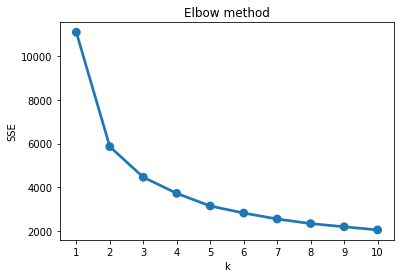

In [20]:
# Fit Kmeans and calculate SSE for each k
sse = {}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
    
# Plot SSE for each k
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**Using elbow criterion method :**
- Best to choose the point on elbow, or the next point
- Use as a guide but test multiple solutions !!

**Experimental approach - analyze segments :**
- Build clustering at and around elbow solution
- Analyze their properties - average RFM values
- Compare against each other and choose one which makes most business sense

In [21]:
# Kmeans withn 3 segments
# Use Kmeans
kmeans = KMeans(n_clusters=3, random_state=1)

# Compute k-means clustering on pre processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 1, 0, 2], dtype=int32)

In [22]:
# Create a cluster label column
datamart_RFM_k3 = datamart_RFM.assign(Cluster = cluster_labels)
datamart_RFM_k3.head()

,Recency,Frequency,MonetaryValue,Cluster
0,2,27,992.82,0
1,1,967,7522.06,0
2,4,37,813.45,0
3,3,17,268.02,0
4,71,9,146.15,2


In [23]:
# Calculate average RFM values and size for each cluster
datamart_RFM_k3.groupby(['Cluster']).agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0      53.0        1128.0   855
1         172.0       3.0          55.0  1225
2          78.0      14.0         232.0  1621

Here, While it does identify the least attractive segments and cluster number 1, it does break down the higher value segments into two: segment zero and segment two. It's up to the analyst and the business partners to review the segments and make the call on which solutions make more sense.

# Profile and interpret segments

**Approaches to build customer personas :**
- Summary statistics for each cluster e.g. average RFM values
- Snake plots (from market research)
- Relative importance of cluster attributes compared to population

**Summary statistics for 2 and 3 clusters :**

In [24]:
# Summary stat for 2 clusters
datamart_RFM_k2.groupby(['Cluster']).agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.0      36.0         730.0  1675
1         145.0       5.0          92.0  2026

In [25]:
# Summary stat for 3 clusters
datamart_RFM_k3.groupby(['Cluster']).agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0      53.0        1128.0   855
1         172.0       3.0          55.0  1225
2          78.0      14.0         232.0  1621

There are some inherent differences between the 2-segment and 3-segment solutions. While the former is simpler, **the 3-segment solution gives more insights.**

**Snake plots to understand and compare segments :**
- Market research technique to compare different segments
- Visual representation of each segment's attributes
- Need to first normalize data (center & scale)
- Plot each cluster's average normalized values of each attribute

In [26]:
# Transform datamart_normalized as DataFrame and add Cluster column
datamart_normalized = pd.DataFrame(datamart_normalized,
                                   index=datamart_RFM.index,
                                   columns=datamart_RFM.columns)
datamart_normalized['Cluster'] = datamart_RFM_k3['Cluster']

In [27]:
datamart_normalized.head()

,Recency,Frequency,MonetaryValue,Cluster
0,-2.195642,0.909521,1.482882,0
1,-2.684553,3.845050,3.022433,0
2,-1.706731,1.168000,1.331390,0
3,-1.909647,0.530005,0.487337,0
4,0.322128,0.008268,0.026297,2


In [28]:
# Melt the data into a long format so RFM values and metric names are stored in 1 column each
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        id_vars=['Cluster'], # CustomerID is missing !
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Attribute',
                        value_name='Value'
                       )
datamart_melt

,Cluster,Attribute,Value
0,0,Recency,-2.195642
1,0,Recency,-2.684553
2,0,Recency,-1.706731
3,0,Recency,-1.909647
4,2,Recency,0.322128
...,...,...,...
11098,1,MonetaryValue,-0.983925
11099,1,MonetaryValue,-1.133219
11100,1,MonetaryValue,-1.159983
11101,0,MonetaryValue,0.851890


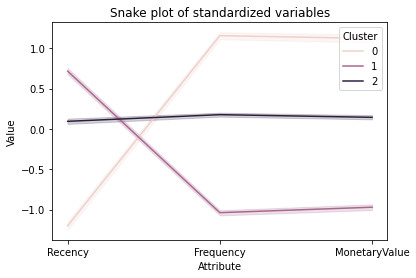

In [29]:
# Snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=datamart_melt)
plt.show()

**Relative importance of segment attributes :**
- Usefull technique to identify relative importance of each segment's attribute

In [30]:
# Calculate average values of each cluster
cluster_avg = datamart_RFM_k3.groupby(['Cluster']).mean()

# Calculate average values of population
population_avg = datamart_RFM.mean()

# Calculate importance score by dividing them and substracting 1 (make sure 0 is returned whaen cluster average equals population average)
relative_imp = cluster_avg / population_avg - 1

**Analyze and plot relative importance :**
- As a ratio moves away form 0, attribute importance for a segment (relative to a total pop) increases

In [31]:
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.85,1.75,1.96
1,0.82,-0.84,-0.85
2,-0.17,-0.29,-0.39


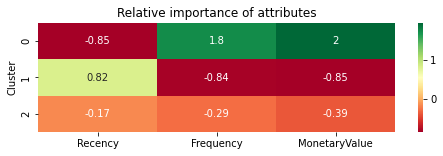

In [32]:
# Plot heatmap
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, cmap='RdYlGn')
plt.show()

# End to end segmentation solution

**Key steps of the segmentation project :**
- Gather data - updated data with an additional variable
- Pre process the data
- Explore the data and decide on the number of clusters
- Run k-means clustering
- Analyze and visualize results

**Updated RFM data :**
- Same RFM values plus additionnal Tenure variable
- Tenure : time since the first transaction
- Defines how long the customer has been with the company

# Final thoughts

**Resume :**
- Cohort Analysis and visualization
- RFM segmentation
- Data pre processing for k means
- Customer segmentation with k-means :
    - Evaluating number of clusters
    - Reviewing and visualizing segmentation solutions